# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from google.colab import drive

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clasification Klustering Dicoding/clustered_data.csv')
df.head()

Mounted at /content/drive


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
0,Sports,41.49,29.02,3.77,8.46,82.74,1
1,Platform,29.08,3.58,6.81,0.77,40.24,2
2,Racing,15.85,12.88,3.79,3.31,35.82,2
3,Sports,15.75,11.01,3.28,2.96,33.00,1
4,Role-Playing,11.27,8.89,10.22,1.00,31.37,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Genre         16291 non-null  object 
 1   NA_Sales      16291 non-null  float64
 2   EU_Sales      16291 non-null  float64
 3   JP_Sales      16291 non-null  float64
 4   Other_Sales   16291 non-null  float64
 5   Global_Sales  16291 non-null  float64
 6   Cluster       16291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 891.0+ KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Cluster sebagai target
y = df['Cluster']  # Target

categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
if len(categorical_cols) > 0:
    print("\nKolom Kategorikal yang Ditemukan:", list(categorical_cols))
    encoder = LabelEncoder()
    for col in categorical_cols:
        X[col] = encoder.fit_transform(X[col])
        print(f"Kolom '{col}' telah di-encode.")
else:
    print("\nTidak ada kolom kategorikal yang perlu di-encode.")

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data pada masing-masing set
print("\nJumlah Data:")
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

# Standardisasi data numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nStandardisasi data berhasil dilakukan.")


Kolom Kategorikal yang Ditemukan: ['Genre']
Kolom 'Genre' telah di-encode.

Jumlah Data:
Training Set: (13032, 6)
Testing Set: (3259, 6)

Standardisasi data berhasil dilakukan.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=100)
logistic_model.fit(X_train, y_train)
print("\nModel Logistic Regression telah dilatih.")

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=10)
random_forest_model.fit(X_train, y_train)
print("Model Random Forest telah dilatih.")

# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Model SVM telah dilatih.")

# Menampilkan hasil latih
print("\nHasil Akurasi Data Latih:")
print(f"Logistic Regression: {logistic_model.score(X_train, y_train):.4f}")
print(f"Random Forest: {random_forest_model.score(X_train, y_train):.4f}")
print(f"SVM: {svm.score(X_train, y_train):.4f}")


Model Logistic Regression telah dilatih.
Model Random Forest telah dilatih.
Model SVM telah dilatih.

Hasil Akurasi Data Latih:
Logistic Regression: 0.9998
Random Forest: 0.9999
SVM: 0.9979


Tulis narasi atau penjelasan algoritma yang Anda gunakan.
*   Logistic Regression
    
    Regresi logistik adalah teknik analisis data yang menggunakan matematika untuk menemukan hubungan antara dua faktor data. Kemudian menggunakan hubungan ini untuk memprediksi nilai dari salah satu faktor tersebut berdasarkan faktor yang lain. Prediksi biasanya memiliki jumlah hasil yang terbatas, seperti ya atau tidak.

*   Random Forest

    Random Forest adalah kumpulan dari decision tree atau pohon keputusan. Algoritma ini merupakan kombinasi masing-masing tree dari decision tree yang kemudian digabungkan menjadi satu model. Biasanya, Random Forest dipakai untuk masalah regresi dan klasifikasi dengan kumpulan data yang berukuran besar.

*   SVM

    SVM (Support vector machines) adalah algoritma machine learning yang diawasi yang mengklasifikasikan data dengan menemukan garis optimal atau hyperplane yang memaksimalkan jarak antara setiap kelas dalam ruang N-dimensi.



## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Logistic Regression - Accuracy: 1.0000, F1-Score: 1.0000

Confusion Matrix - Logistic Regression:
[[1072    0    0]
 [   0 1315    0]
 [   0    0  872]]


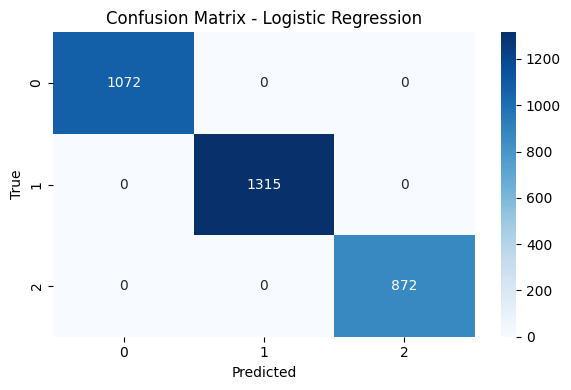

In [7]:
# Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

logistic_acc = accuracy_score(y_test, y_pred_logistic)
logistic_f1 = f1_score(y_test, y_pred_logistic, average='weighted')
print(f"Logistic Regression - Accuracy: {logistic_acc:.4f}, F1-Score: {logistic_f1:.4f}")

print("\nConfusion Matrix - Logistic Regression:")
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print(conf_matrix_logistic)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

Random Forest - Accuracy: 1.0000, F1-Score: 1.0000

Confusion Matrix - Random Forest:
[[1072    0    0]
 [   0 1315    0]
 [   0    0  872]]


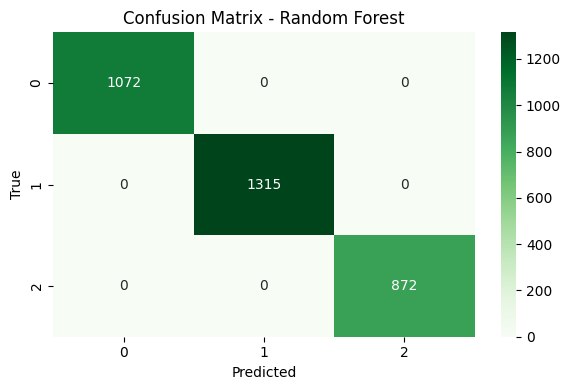

In [8]:
# Random Forest
y_pred_rf = random_forest_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {rf_acc:.4f}, F1-Score: {rf_f1:.4f}")

# Confusion Matrix untuk Random Forest
print("\nConfusion Matrix - Random Forest:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

# Visualisasi Confusion Matrix untuk Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

SVM - Accuracy: 0.9954, F1-Score: 0.9954

Confusion Matrix - SVM:
[[1064    4    4]
 [   0 1313    2]
 [   0    5  867]]


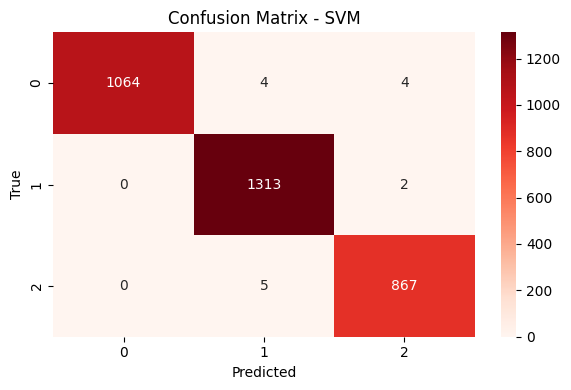

In [9]:
# SVM
y_pred_svm = svm.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM - Accuracy: {svm_acc:.4f}, F1-Score: {svm_f1:.4f}")

# Confusion Matrix untuk SVM
print("\nConfusion Matrix - SVM:")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

# Visualisasi Confusion Matrix untuk SVM
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [10]:
# Calculate classification reports
logistic_best_report = classification_report(y_test, y_pred_logistic, digits=5, output_dict=True)
rf_best_report = classification_report(y_test, y_pred_rf, digits=5, output_dict=True)
svm_best_report = classification_report(y_test, y_pred_svm, digits=5, output_dict=True)

metrics_tuned = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [logistic_best_report['accuracy'], rf_best_report['accuracy'], svm_best_report['accuracy']],
    'Precision': [logistic_best_report['weighted avg']['precision'], rf_best_report['weighted avg']['precision'], svm_best_report['weighted avg']['precision']],
    'Recall': [logistic_best_report['weighted avg']['recall'], rf_best_report['weighted avg']['recall'], svm_best_report['weighted avg']['recall']],
    'F1-Score': [logistic_best_report['weighted avg']['f1-score'], rf_best_report['weighted avg']['f1-score'], svm_best_report['weighted avg']['f1-score']]
}

df_tuned = pd.DataFrame(metrics_tuned)
df_tuned

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,SVM,0.995397,0.995414,0.995397,0.995398


1. Perbandingan Hasil Evaluasi

    Random Forest, Logistic Regression memiliki Accuracy, Precision, Recall, F1 tinggi.

    SVM juga menunjukkan Accuracy, Precision, Recall, F1 yang baik tapi lebih rendah.

2. Identifikasi Kelemahan Model

    Precision dan Recall: Penting untuk memeriksa apakah ada kelas tertentu yang memiliki precision atau recall rendah, terutama pada kelas minoritas. Meski hasilnya sangat baik, perlu dicek apakah model cenderung bias terhadap kelas mayoritas.

    Overfitting atau Underfitting: Berdasarkan hasil cross-validation, model tidak menunjukkan tanda-tanda overfitting atau underfitting.Random Forest, Logistic Regression cukup stabil, sedangkan SVM sedikit lebih rendah, tetapi hasilnya cukup stabil.

3. Rekomendasi Tindakan Lanjutan

    *   Mengumpulkan lebih banyak data membantu model lebih baik dalam melakukan prediksi.
    *   Mencoba Algoritma lain seperti Decision Tree, dan KNN
    *   Melakukan teknik cross-validation untuk mendapatkan gambaran yang lebih akurat tentang performa model.